<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Descrição do Projeto</center></h1>

O objetivo deste projeto é solucionar a questão de insatisfação enfrentada pela empresa Megaline, que está relacionada ao fato de muitos de seus clientes ainda utilizarem planos antigos de Telecom (chamadas, mensagens e internet) e não aderirem aos novos planos lançados, como os planos Smart e Ultra.

A proposta consiste em desenvolver uma modelagem de dados que tem como o intuito de alcançar a maior precisão possível. Neste caso, estabelecemos um limite mínimo de **acurácia de 0,75**.

Assim para que a empresa tenha insumos para a tomada de decisões ao alcance de propagandas mais efetivas para migras seus usuários para os novos planos.

#### Descrição dos Dados

Cada registro no conjunto de dados possui dados mensais sobre o comportamento de um usuário. As informações fornecidas são as seguintes:

- сalls — número de chamadas
- minutes — duração total da chamada em minutos
- messages — número de mensagens de texto
- mb_used — Tráfego de Internet usado em MB
- is_ultra — plano para o mês atual (Ultra - 1, Smart - 0)

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Metodologia Crisp-DM</center></h1>

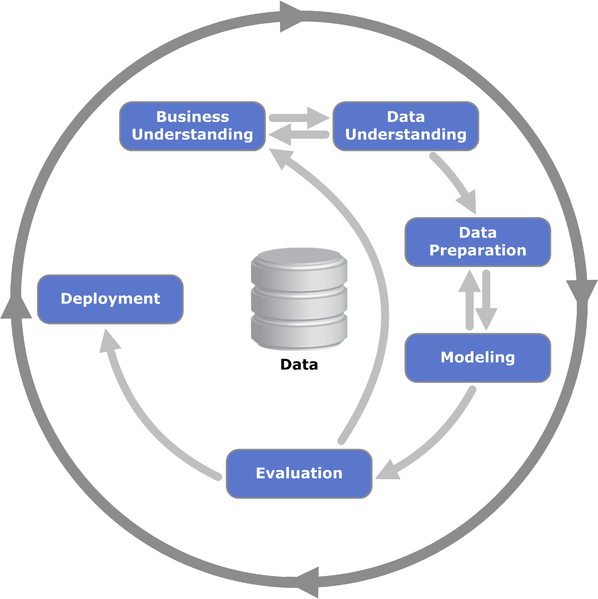

**- O que é CRISP DM?**

O CRISP DM, que significa Processo Padrão Inter-Indústrias para Mineração de Dados, é uma metodologia ágil criada em 1996 pela IBM (International Business Machines). Ele oferece uma abordagem estruturada e robusta para o planejamento de projetos que envolvem Machine Learning, mineração e análise de dados.

O objetivo principal do CRISP DM era fornecer uma metodologia específica para projetos que lidavam com dados. Embora houvesse várias metodologias disponíveis na época, todas apresentavam deficiências quando se tratava de processar e analisar grandes volumes de dados.

O CRISP DM baseia-se em princípios que envolvem agilidade, entrega incremental e técnicas de concepção e validação de estratégias para projetos. Essa abordagem permite que as equipes trabalhem de forma eficiente e iterativa, garantindo uma implementação eficaz e um resultado bem-sucedido para os projetos de mineração de dados.

**- Como o CRISP DM funciona?**

O CRISP DM opera como um processo cíclico devido à complexidade de projetos que envolvem uma grande quantidade de dados, informações e variáveis. Nessas situações, é difícil ter uma compreensão completa do resultado final do projeto desde o início. Portanto, é necessário um processo que permita explorar passo a passo e que possa retornar aos estágios anteriores sempre que necessário.

Na imagem a seguir, você poderá observar como funciona o ciclo de vida do projeto com essa metodologia. As linhas que interligam os estágios indicam as dependências mais frequentes e importantes entre as etapas.

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Importando Bibliotecas</center></h1>

In [1]:
# instalando biblioteca graphviz
!pip install graphviz==0.20.1

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz

import warnings
warnings.filterwarnings("ignore")

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Leitura do Dataset</center></h1>

In [3]:
# realizando o carregamento de dados e verificando as primeiras e últimas linhas da base de dados
dados = pd.read_csv('users_behavior.csv')
# verificação das primeiras e ultimas linhas do dataset
dados

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>EDA - Análise Exploratória</center></h1>

In [4]:
# verificando tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# utilizando a função describe
dados.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
# verificando dados ausentes
dados.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
# verificando dados duplicados
dados.duplicated().sum()

0

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Data Visualization</center></h1>

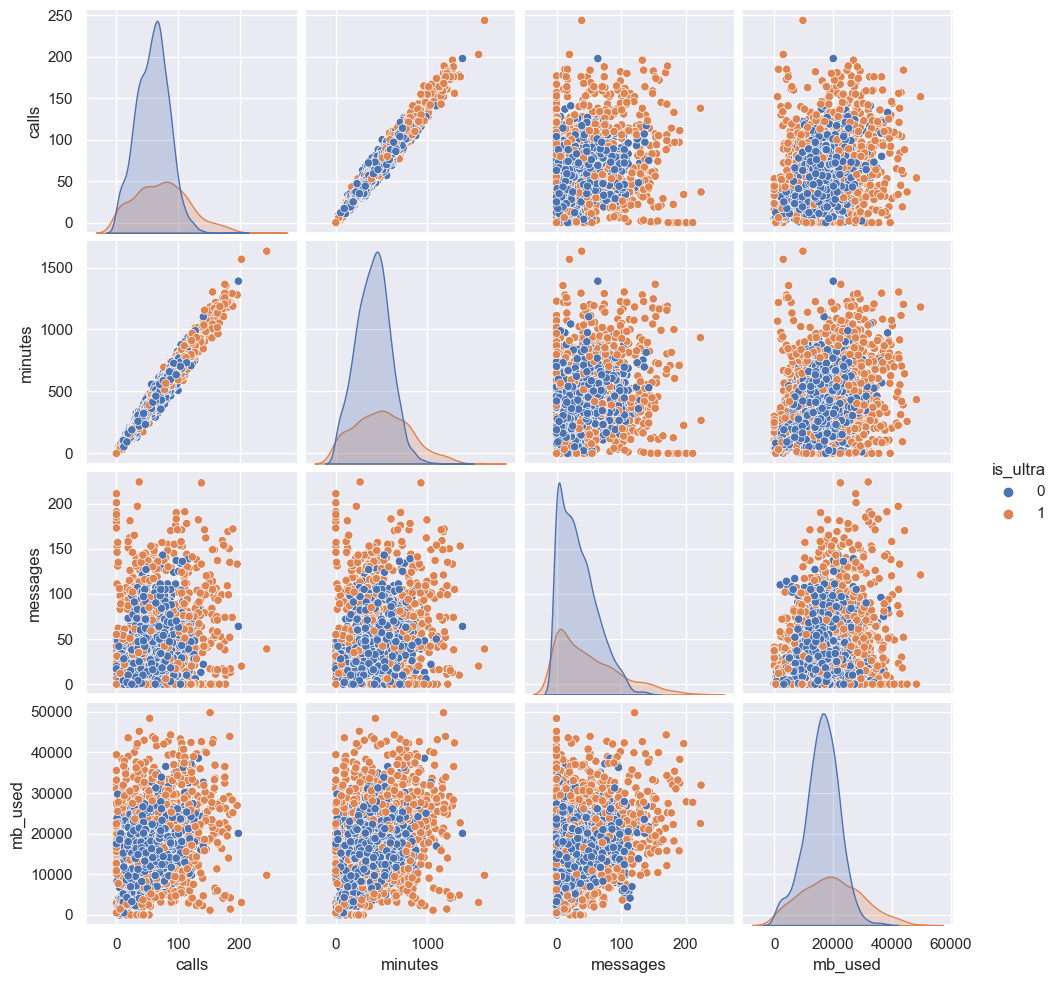

In [8]:
#fixando plot para seaborn
sns.set()
# plotando gráfico pairplot 
sns.pairplot(dados,hue="is_ultra");


Ao analisar o gráfico pairplot, podemos observar que existe uma grande concentração de usuários dos planos antigos em todos os serviços, incluindo chamadas, internet e dados. Notamos que o comportamento desses usuários antigos difere dos usuários do plano "ultra" em termos de consumo. Os usuários antigos tendem a consumir excessivamente todos os serviços, apesar de possuírem pacotes de serviços menores. Vamos investigar também a presença de outliers, pois isso pode obscurecer ainda mais esse comportamento.

Outro padrão consistente que ocorre entre os usuários dos planos antigos é que os dados estão agrupados em uma faixa específica no gráfico, em comparação com os usuários do plano "ultra". Isso indica um comportamento semelhante dos clientes dos planos antigos. Uma hipótese é que existe uma maior limitação nos planos antigos, enquanto no plano "ultra" observamos um comportamento mais disperso dos clientes, utilizando os serviços dentro da média e expandindo sua utilização, uma vez que o plano oferece limites de utilização mais altos.

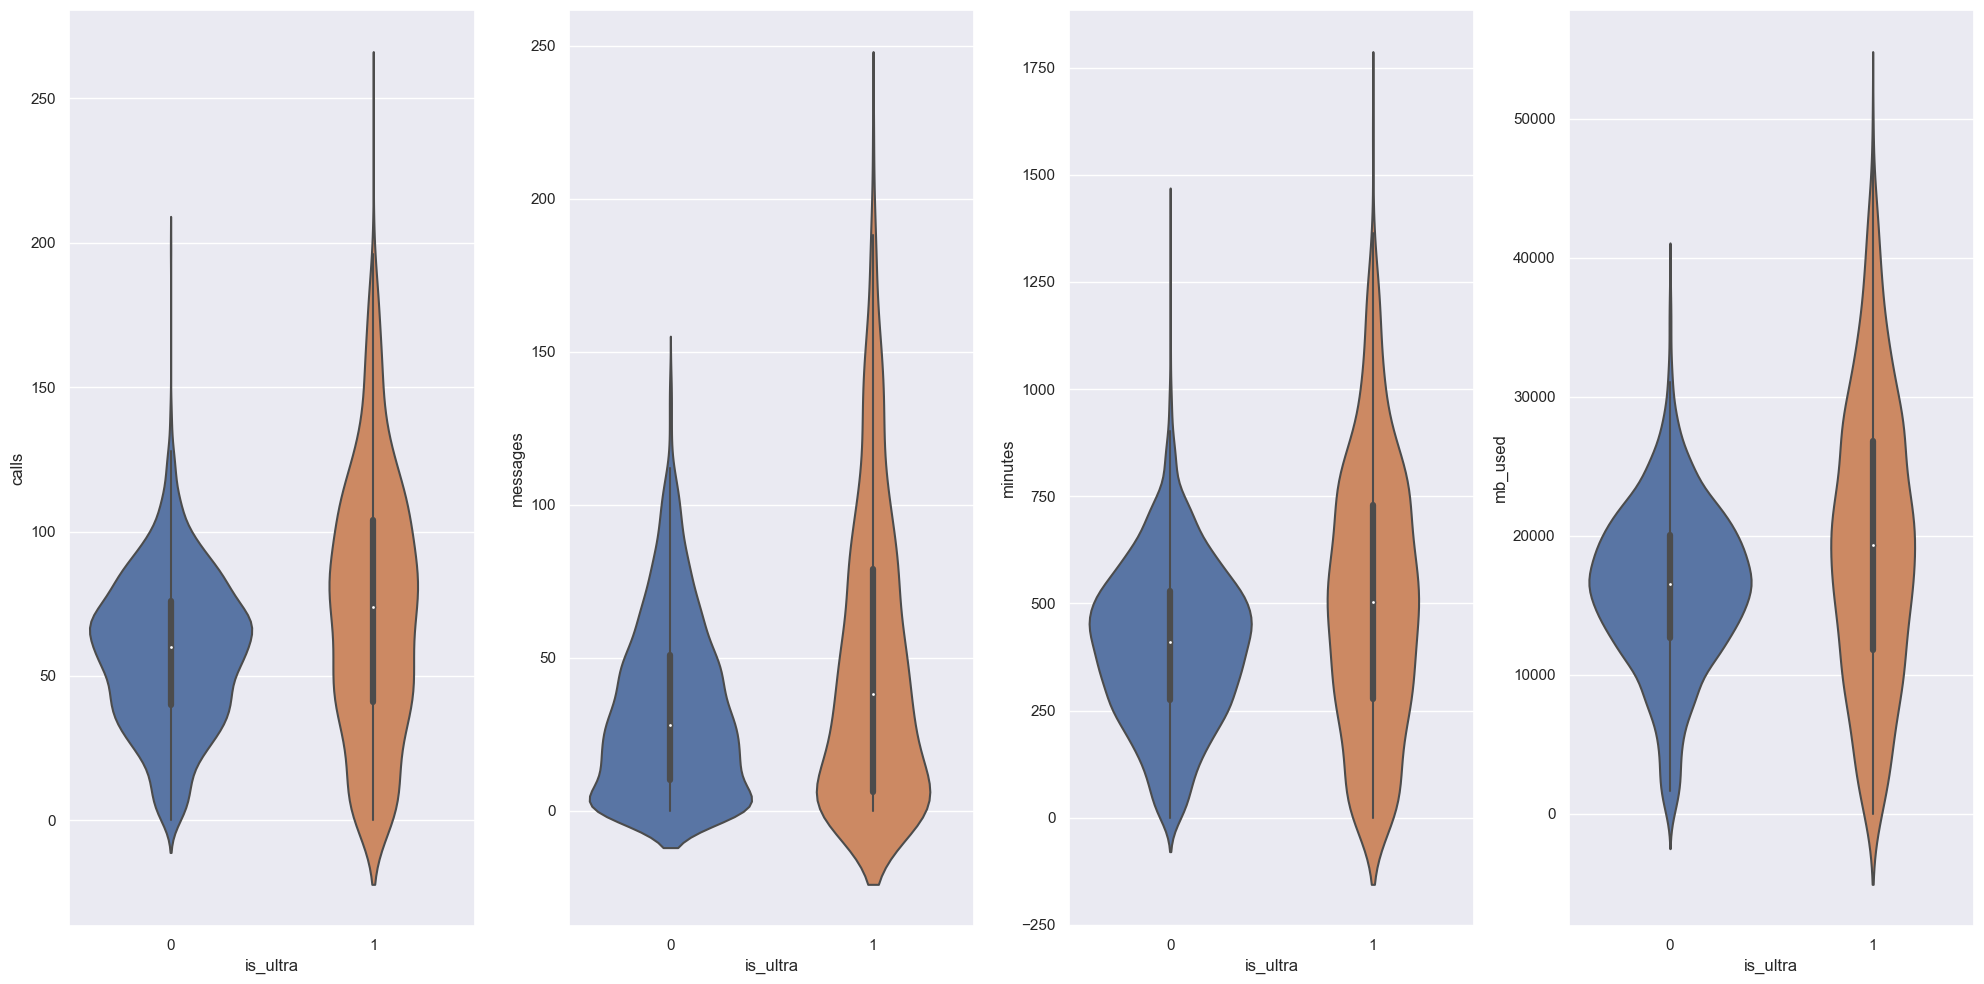

In [9]:
# plotando grafico violino
num_vars = ['calls', 'messages', 'minutes', 'mb_used']

#fixando plot para seaborn
sns.set()

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=dados, x='is_ultra',ax=axs[i])

fig.tight_layout()

Ao analisar o gráfico de violino, é possível obter mais detalhes sobre o comportamento dos usuários em cada serviço. De forma geral, podemos perceber que os usuários dos planos antigos apresentam uma maior concentração de uso em regiões específicas em todos os serviços, enquanto os usuários do plano "ultra" possuem uma distribuição mais uniforme e um intervalo maior na média de utilização em todos os serviços.

É importante destacar que a acumulação de uma grande quantidade de dados em faixas específicas do gráfico, principalmente para os planos antigos, pode estar relacionada à limitação dos pacotes desses planos, o que pode gerar insatisfação por parte dos clientes ao pagar por possíveis excedentes e/ou não encontrar uma forma de migrar para outros planos.

**Chamadas** - Para esse serviço, podemos observar que os usuários dos planos antigos apresentam uma maior utilização, com um volume concentrado entre 45 e 75 chamadas, enquanto os usuários do plano "ultra" têm uma média mais alta, utilizando aproximadamente de 45 a 95 chamadas.

**Mensagens** - Para ambos os grupos, percebemos um comportamento consistente de baixa aderência a esse serviço, com uma grande parcela de usuários próximo a zero mensagens. Esse comportamento pode ser esperado, considerando a demanda tecnológica por aplicativos de mensagens e a preferência dos clientes por esses aplicativos no mercado atual.

**Minutos** - Assim como nas chamadas, notamos que os usuários dos planos antigos têm uma concentração significativa de minutos de uso, situando-se principalmente entre 250 e 500 minutos. No próximo gráfico de boxplot, veremos a presença de outliers para fornecer maior visibilidade a essa característica no comportamento dos usuários.

**Internet** - Entre todos os serviços, a utilização de internet é a que apresenta uma maior concentração de clientes dos planos antigos, com volumes fixados entre 10.000 e 20.000 megabytes, enquanto no plano "ultra" a distribuição é mais uniforme.

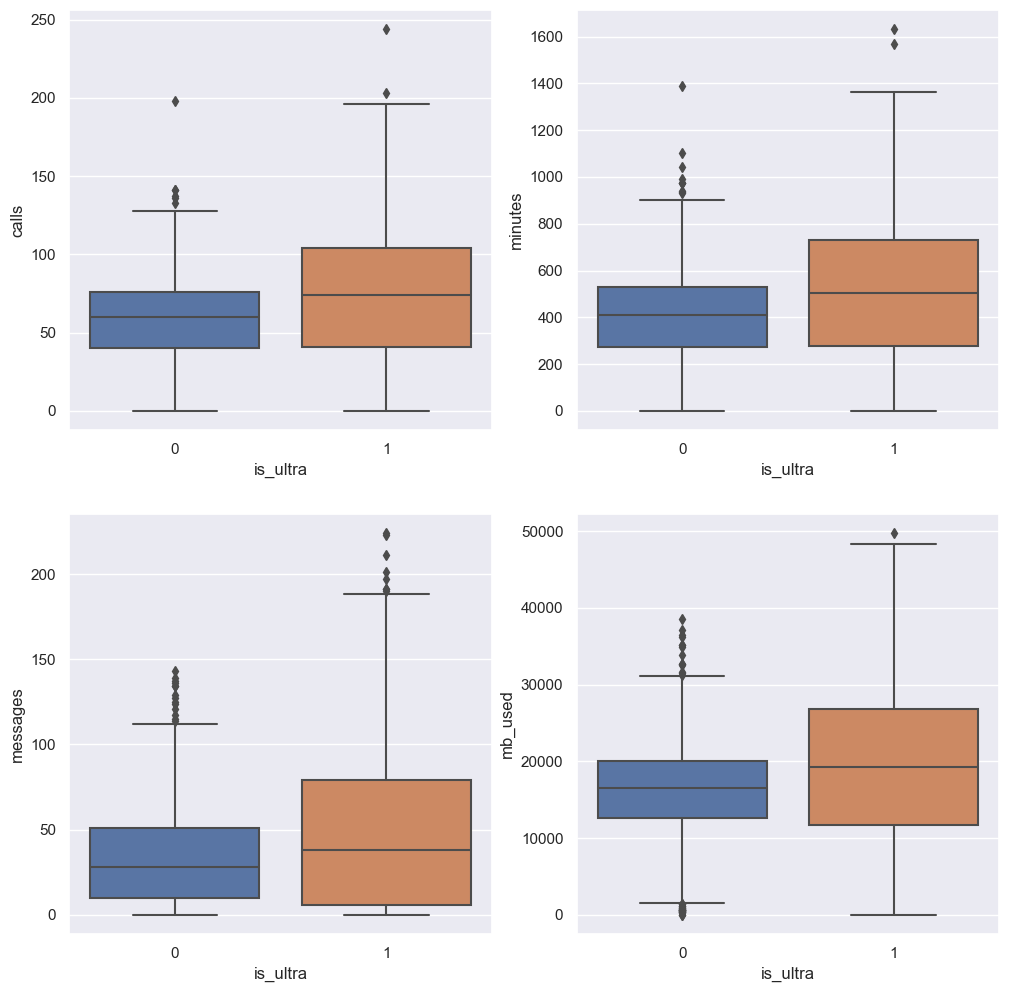

In [10]:
#fixando plot para seaborn
sns.set()

# definindo a região de plot (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2,figsize=(12,12));

#criando boxplot
sns.boxplot(data=dados, x='is_ultra', y='calls', ax=axes[0,0]);
sns.boxplot(data=dados, x='is_ultra', y='minutes', ax=axes[0,1]);
sns.boxplot(data=dados, x='is_ultra', y='messages', ax=axes[1,0]);
sns.boxplot(data=dados, x='is_ultra', y='mb_used', ax=axes[1,1]);

Ao analisar o gráfico boxplot, podemos confirmar as informações observadas no gráfico anterior. O boxplot revela a presença de outliers, sendo mais comuns nos planos antigos em comparação ao plano "ultra". Nos serviços de mensagens e internet, identificamos a presença desses valores excedentes. No entanto, é importante ressaltar que as médias de utilização para todos os serviços, tanto nos planos antigos quanto no plano "ultra", estão bastante próximas. Isso reforça a hipótese de que muitos usuários dos planos antigos já estão acostumados a utilizar pacotes que estão próximos de seus limites, correndo o risco de pagar por excedentes.

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Preparando e Dividindo Dados Modelagem</center></h1>

In [11]:
# segmentando as features para realizar a divisão dos dados
x = dados[['calls','minutes','messages','mb_used']]
y = dados['is_ultra']

In [12]:
# fixando as proporções de valores para as segmentações realizada nos dados

treino = 0.6
validacao = 0.2
teste = 0.2

In [13]:
# dividindo os dados entre treino, validação e teste

# implantando semente
SEED = 50

# divisão inicial em dados de treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=teste, random_state=23456)

# divisão dos dados de treino em treino e validação
treino_x, valid_x, treino_y, valid_y = train_test_split(treino_x, treino_y, test_size=validacao, random_state=23456)

# imprimindo a quantidade de dados a serem testados
print('Treinaremos com %d elementos e validaremos com %d elementos' % (len(treino_x), len(valid_x)))
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

Treinaremos com 2056 elementos e validaremos com 515 elementos
Treinaremos com 2056 elementos e testaremos com 643 elementos


<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Pré-Análise Previsões Modelos Machine Learnig</center></h1>

* #### Análise inicial para o modelo RandomForestClassifier

In [14]:
modelo = RandomForestClassifier()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(valid_x)

acuracia = accuracy_score(valid_y,previsoes) * 100

print('A acurácia foi de %.2f%%' % acuracia)

A acurácia foi de 76.89%


* #### Análise inicial para o modelo DecisionTreeClassifier

In [15]:
modelo = DecisionTreeClassifier()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(valid_x)

acuracia = accuracy_score(valid_y,previsoes) * 100

print('A acurácia foi de %.2f%%' % acuracia)

A acurácia foi de 71.84%


* #### Análise inicial para o modelo LogisticRegression

In [16]:
modelo = LogisticRegression()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(valid_x)

acuracia = accuracy_score(valid_y,previsoes) * 100

print('A acurácia foi de %.2f%%' % acuracia)

A acurácia foi de 73.79%


Ao realizar uma pré-análise usando a função predict, dentro do processo de validação os 3 modelos de estimadores sendo, Random Florest, Decision Tree e Logistic Regression tivemos a seguinte acurácia:

- Random Florest **76,50%**
- Logistic Regression **73,79%**
- Decision Tree **71,65%**

Os próximos passos serão de explorar os hiperparêmetros uma vez que o único modelo que ficou acima do score desejado pela empresa Megaline que é de **75%**, foi o Random Florest, o objetivo é melhorar todos os estimadores para melhores percentuais e escolher o que mostrar a acuária maior.


<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Otimizando os Hiperparâmentos</center></h1>


Para otimizar os hiperparâmetros, utilizaremos o **GridSearchCV**, uma ferramenta que automatiza o processo de ajuste dos parâmetros de um algoritmo. O GridSearchCV realiza de maneira sistemática diversas combinações dos parâmetros especificados e avalia cada combinação, armazenando os resultados em um único objeto. O objetivo principal do GridSearchCV é gerar diferentes combinações de parâmetros para posterior avaliação.

* #### Hiperparâmentros RandomForest

In [17]:
# numeros de trees do random florest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# numeros de features para considerar em cada divisão
max_features = ['auto','sqrt']
# maximo de numeros de nivels da tree
max_depth = [2,4]
# minimo de numeros de exemplo requiridos na divisão do nó
min_samples_split = [2,5]
# minimo de numeros de exemplo requeridos em cada folha do nó
min_samples_leaf = [1,2]
# metodo de selecionar exemplos para treinar cada arvore
bootstrap = [True,False]

Detalhando os hiperparêmetros **RandomForest**:
- n_estimators - número de arvores da floresta que o algoritmo irá estimar.
- max_features - O número de recursos a serem considerados ao procurar a melhor divisão
- max_depth - A profundidade máxima da árvore. Se Nenhum, os nós serão expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split amostras.
- min_samples_split - O número mínimo de amostras necessárias para dividir um nó interno
- min_samples_leaf - O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos amostras de treinamento min_samples_leaf em cada uma das ramificações esquerda e direita. Isso pode ter o efeito de suavizar o modelo, especialmente na regressão.


In [18]:
# criando os paramentos da grade

param_grid = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf' : min_samples_leaf,              
              'bootstrap' : bootstrap}

In [19]:
Rf_Model = RandomForestClassifier()
Rf_Grid_treino = GridSearchCV(estimator = Rf_Model, param_grid = param_grid, cv = 3,verbose = 2,n_jobs = 4)
Rf_Grid_valid  = GridSearchCV(estimator = Rf_Model, param_grid = param_grid, cv = 3,verbose = 2,n_jobs = 4)

In [20]:
Rf_Grid_treino.fit(treino_x,treino_y)
Rf_Grid_valid.fit(valid_x,valid_y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [21]:
Rf_Grid_treino.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 80}

In [22]:
Rf_Grid_valid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

In [23]:
print(f' Acurácia do treinamento RandomForestClassifier - : {Rf_Grid_treino.score(treino_x, treino_y) : .3f}')
print(f' Acurácia do validação RandomForestClassifier - : {Rf_Grid_valid.score(valid_x, valid_y) : .3f}')

 Acurácia do treinamento RandomForestClassifier - :  0.813
 Acurácia do validação RandomForestClassifier - :  0.837


**Após o ajuste de hiperparametros no modelo Random Florest, utilizando o GridSearchCV, tivemos um ganho dentro da validação de 7.2 pp.** 

* #### Hiperparâmentros DecisionTree

In [24]:
parametros = {'max_depth' : (10,30,50,70,90,100),
              'criterion' : ('gini','entropy'),
              'max_depth' : (3,5,7,9,10),
              'max_features' : ('auto','sqrt','log2')
              }

Detalhando os hiperparêmetros **DecisionTree**  

- max_depth -  A profundidade máxima da árvore. Se Nenhum, os nós serão expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split amostras.
- criterion - A função para medir a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza de Gini e “log_loss” e “entropia” para o ganho de informação de Shannon, consulte Formulação matemática.
- max_features - O número de recursos a serem considerados ao procurar a melhor divisão.


In [25]:
DT_grid_treino = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions = parametros, cv = 5,verbose=True)
DT_grid_valid = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions = parametros, cv = 5,verbose=True)

DT_grid_treino.fit(treino_x,treino_y)
DT_grid_valid.fit(valid_x,valid_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2')},
                   verbose=True)

In [26]:
DT_grid_treino.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [27]:
DT_grid_valid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt')

In [28]:
DT_modelo_treino = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')
DT_modelo_treino.fit(treino_x, treino_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [29]:
DT_modelo_validacao = DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt')
DT_modelo_validacao.fit(valid_x, valid_y)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt')

In [30]:
print(f' Acurácia do treinamento DecisionTreeClassifier - : {DT_modelo_treino.score(treino_x,treino_y) : .3f}')
print(f' Acurácia do validação DecisionTreeClassifier - : {DT_modelo_validacao.score(valid_x,valid_y) : .3f}')

 Acurácia do treinamento DecisionTreeClassifier - :  0.812
 Acurácia do validação DecisionTreeClassifier - :  0.897


**Após o ajuste de hiperparametros no modelo Decision Tree, utilizando o GridSearchCV, tivemos um ganho dentro da validação de 118.05 pp.** 

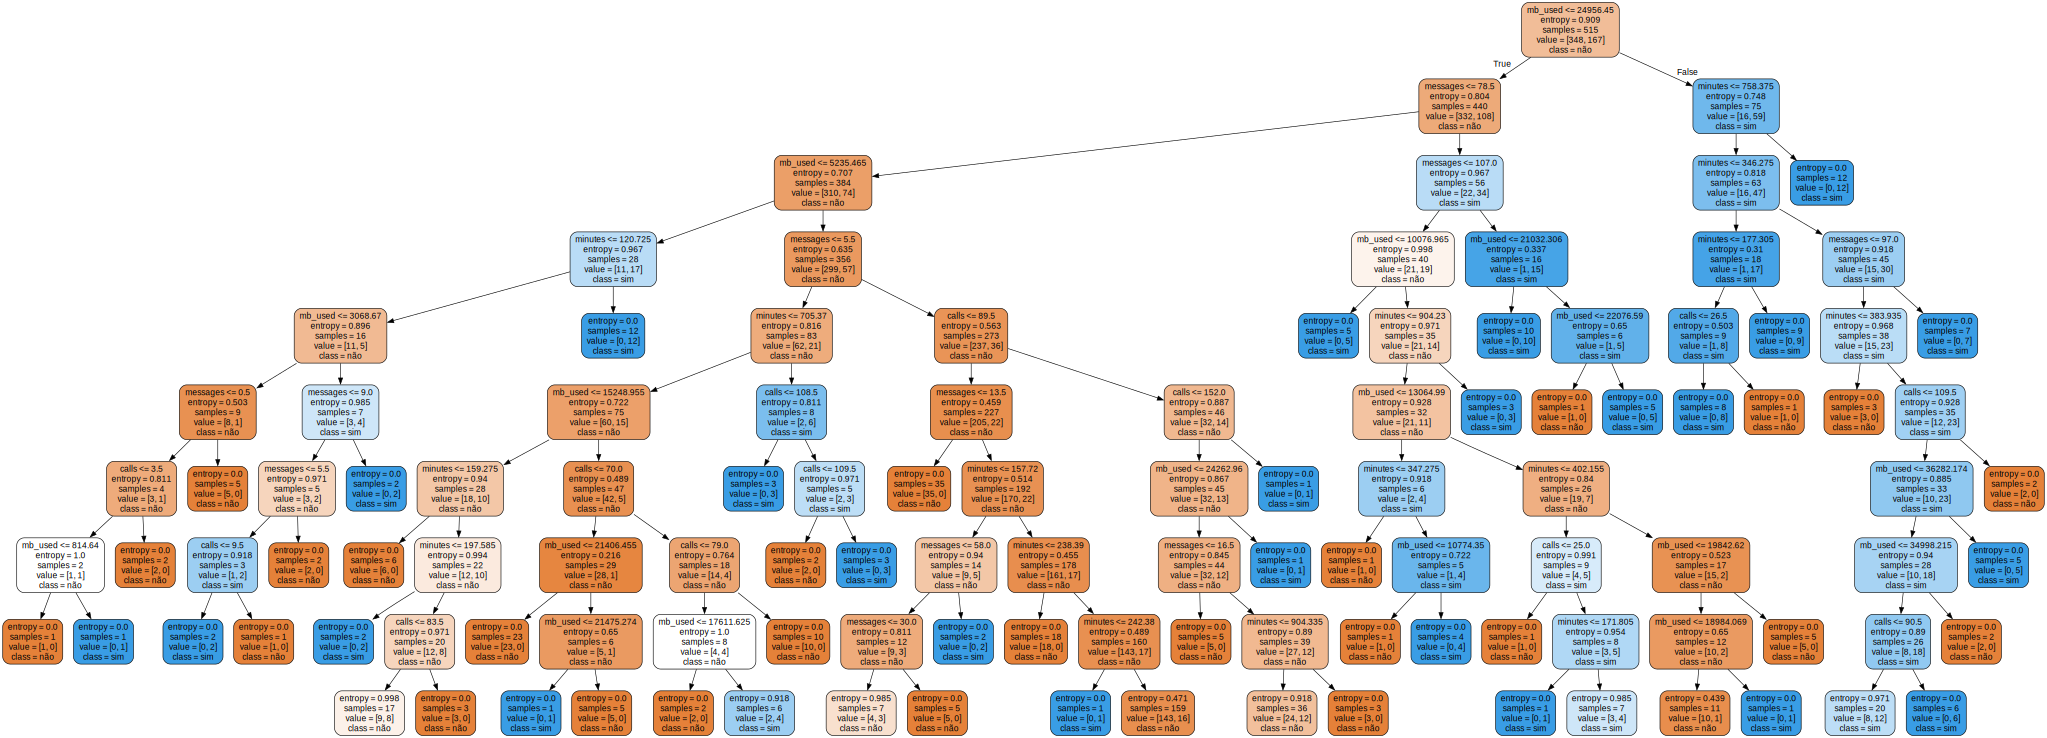

In [74]:
features = x.columns
dot_data = export_graphviz(DT_modelo_validacao, out_file=None,feature_names=features,filled=True,rounded=True,class_names=['não','sim'])                    
grafico = graphviz.Source(dot_data)
grafico

#### Aprofundando nos hiperparametros LogisticRegression

In [32]:
logModelo = LogisticRegression()

In [45]:
param_grid = [{
    'C' : np.logspace(-4,4,10),   
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [10,100,1000,2500,5000]
}]

Detalhando os hiperparêmetros **LogisticRegression**:

- C - Inverso da força de regularização; deve ser um float positivo. Como nas máquinas de vetores de suporte, valores menores especificam uma regularização mais forte.

- solver - Algoritmo a utilizar no problema de optimização. O padrão é ‘lbfgs’. Para escolher um solucionador, você pode querer considerar certos aspectos como por exemplo, para pequenos conjuntos de dados, 'liblinear' é uma boa escolha, enquanto 'sag' e 'saga' são mais rápidos para grandes;


In [46]:
clf_treino = GridSearchCV (logModelo, param_grid = param_grid, cv = 3, verbose =True, n_jobs=-1)
clf_validacao = GridSearchCV (logModelo, param_grid = param_grid, cv = 3, verbose =True, n_jobs=-1)

In [47]:
best_clf_treino = clf_treino.fit(treino_x, treino_y)
best_clf_validacao = clf_validacao.fit(valid_x, valid_y)

Fitting 3 folds for each of 250 candidates, totalling 750 fits
Fitting 3 folds for each of 250 candidates, totalling 750 fits


In [49]:
best_clf_treino.best_estimator_

LogisticRegression(C=0.000774263682681127, solver='newton-cg')

In [50]:
best_clf_validacao.best_estimator_

LogisticRegression(C=0.000774263682681127, solver='newton-cg')

In [51]:
print(f' Acurácia do treinamento LogisticRegression - : {best_clf_treino.score(treino_x,treino_y) : .3f}')
print(f' Acurácia do validação LogisticRegression - : {best_clf_validacao.score(valid_x,valid_y) : .3f}')

 Acurácia do treinamento LogisticRegression - :  0.753
 Acurácia do validação LogisticRegression - :  0.738


**Após o ajuste de hiperparametros no modelo Logistic Regression, utilizando o GridSearchCV, tivemos o mesmo percentual durante a pré-análise.**

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Realizando Teste após validação</center></h1>

* #### Teste realizado com RandomForestClassifier**

In [97]:
Rf_Grid_treino.best_params_

print(f' Acurácia do teste RandomForestClassifier - : {Rf_Grid_treino.score(teste_x, teste_y) : .3f}')

 Acurácia do teste RandomForestClassifier - :  0.807


* #### Teste realizado com DecisionTreeClassifier**

In [101]:
DT_modelo_treino.fit(teste_x, teste_y)
print(f' Acurácia do teste DecisionTreeClassifier - : {DT_modelo_validacao.score(teste_x,teste_y) : .3f}')

 Acurácia do teste DecisionTreeClassifier - :  0.764


* #### Teste realizado com LogisticRegression**

In [54]:
best_clf_treino.best_estimator_
print(f' Acurácia do teste LogisticRegression - : {best_clf_treino.score(teste_x,teste_y) : .3f}')

 Acurácia do teste LogisticRegression - :  0.751


**Após realizar os ajustes dentro dos hiperparametros de cada modelo, conseguimos atingir dentro da etapa de testes que todos ficassem dentro do target solicitado pela Megaline de 75%.**

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Confusion Matrix</center></h1>

**Random Florest**

In [ ]:
modelo = RandomForestClassifier()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(valid_x)

In [104]:
cm = confusion_matrix(valid_y,previsoes)
print(cm)

[[332  16]
 [119  48]]


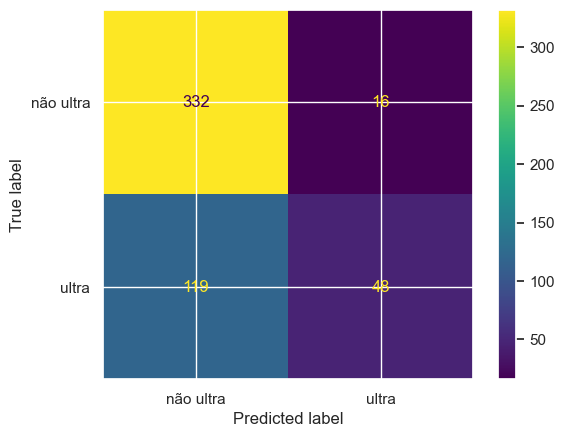

In [107]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['não ultra','ultra'])
cm_display.plot();

Random Florest foi o modelo que após as validações e testes obteve o melhor resultado, portanto é importante validar junto a matrix de confusão para dar maior visibilidade para os acertos que foram previstos, dentro do estudo.

O estudo realizado possuio uma grande taxa de acerto entre as segmentações de falso e verdadeiro negativo e tem oportunidades para melhoria na questão dos positivos, principalmente para os falso positivos.

<h1 style='background:#161385;border-radius:10px; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Conclusão Geral</center></h1>

O objetivo principal deste projeto era alcançar uma acurácia de 75% nos modelos de estimadores testados. Após ajustar os hiperparâmetros, conseguimos melhorar e entregar todos os três modelos com uma **acurácia dentro e acima da meta de 75%.**

Iniciamos importando as bibliotecas necessárias, realizando a leitura dos dados e tratando-os. Em seguida, realizamos uma análise exploratória dos dados, comentando a interpretação de cada gráfico.

Na fase de modelagem dos dados, iniciamos fazendo previsões utilizando todos os estimadores e identificando oportunidades de melhoria. Realizamos um mergulho profundo na otimização dos hiperparâmetros, alcançando o resultado desejado na validação, conforme estabelecido pela empresa. Ao realizar os testes, validamos que os mesmos resultados foram mantidos. O estimador Random Forest se destacou como o melhor modelo para este estudo de caso.

Além disso, como sugestão para a empresa, recomenda-se abordar os usuários da Megaline identificados neste estudo como possíveis migrantes para os novos planos, por meio de estratégias de marketing, visando avançar para a próxima etapa do negócio.